# Customer churn, also known as customer retention, customer turnover, or customer defection, is the loss of clients or customers

1. Data overview
3. Data preprocessing
4. Model Building

In [1]:
# import all libraries required for data analysis and visiulazition

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data as csv from local maachine, 3 separate csv files 

churn = pd.read_csv('C:\\Users\\DercoN\\Desktop\\Python\\csv_files\\churn.csv', delimiter=';')
churn1 = pd.read_csv('C:\\Users\\DercoN\\Desktop\\Python\\csv_files\\churn1.csv', delimiter=';')
churn2 = pd.read_csv('C:\\Users\\DercoN\\Desktop\\Python\\csv_files\\churn2.csv', delimiter=';')

In [3]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn1.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
churn2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
churn.shape

(7042, 9)

In [7]:
churn1.shape

(7042, 9)

In [8]:
churn2.shape

(7042, 5)

All dataframe has 7042 rows , I will perform inner join on customerID

#Merge all dataframes to one dataframe

In [9]:
merge1 = pd.merge(churn2,churn1 , on ='customerID', how='inner' )

In [10]:
merge1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [11]:
# Merge churn with merge1 dataframe 

merge2 = pd.merge(merge1,churn , on='customerID' , how='inner')

In [12]:
merge2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df = merge2.copy(deep=True)

In [14]:
df.shape

(7042, 21)

In [15]:
df[df.duplicated]

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [16]:
# There's no duplicate rows on merged dataframe

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
# No null values on dataframe

In [19]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
# Drop customerID column as is not needed for analysis

df.drop(['customerID'], axis='columns' , inplace=True)

In [21]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

I will just run a for loop to check unique values for all columns

In [22]:
for col in df.columns[0:]:
    print(col)
    print(df[col].unique(),'\n')
    

gender
['Female' 'Male'] 

SeniorCitizen
[0 1] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes' 'No internet service'] 

OnlineBackup
['Yes' 'No' 'No internet service'] 

DeviceProtection
['No' 'Yes' 'No internet service'] 

TechSupport
['No' 'Yes' 'No internet service'] 

StreamingTV
['No' 'Yes' 'No internet service'] 

StreamingMovies
['No' 'Yes' 'No internet service'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService
['No' 'Yes'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  

In [23]:
# Do some transformaton on some columns to "Yes and No"

df.replace({
    'No internet service':'No',
    'No phone service':'No'
},inplace=True)

In [24]:
for col in df.columns[0:]:
    print(col)
    print(df[col].unique(),'\n')

gender
['Female' 'Male'] 

SeniorCitizen
[0 1] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

MultipleLines
['No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes'] 

OnlineBackup
['Yes' 'No'] 

DeviceProtection
['No' 'Yes'] 

TechSupport
['No' 'Yes'] 

StreamingTV
['No' 'Yes'] 

StreamingMovies
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService
['No' 'Yes'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

TotalCharges
['29.85' '1889.5' '108.15' ... '7362.9' '346.45' '306.6'] 

Churn
['No' 'Yes'] 



In [25]:
# Look into InternetService column

df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [26]:
# Convert 'No' to 'Standard' 

df['InternetService'].replace({'No':'Standard'},inplace=True)

In [27]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'Standard'], dtype=object)

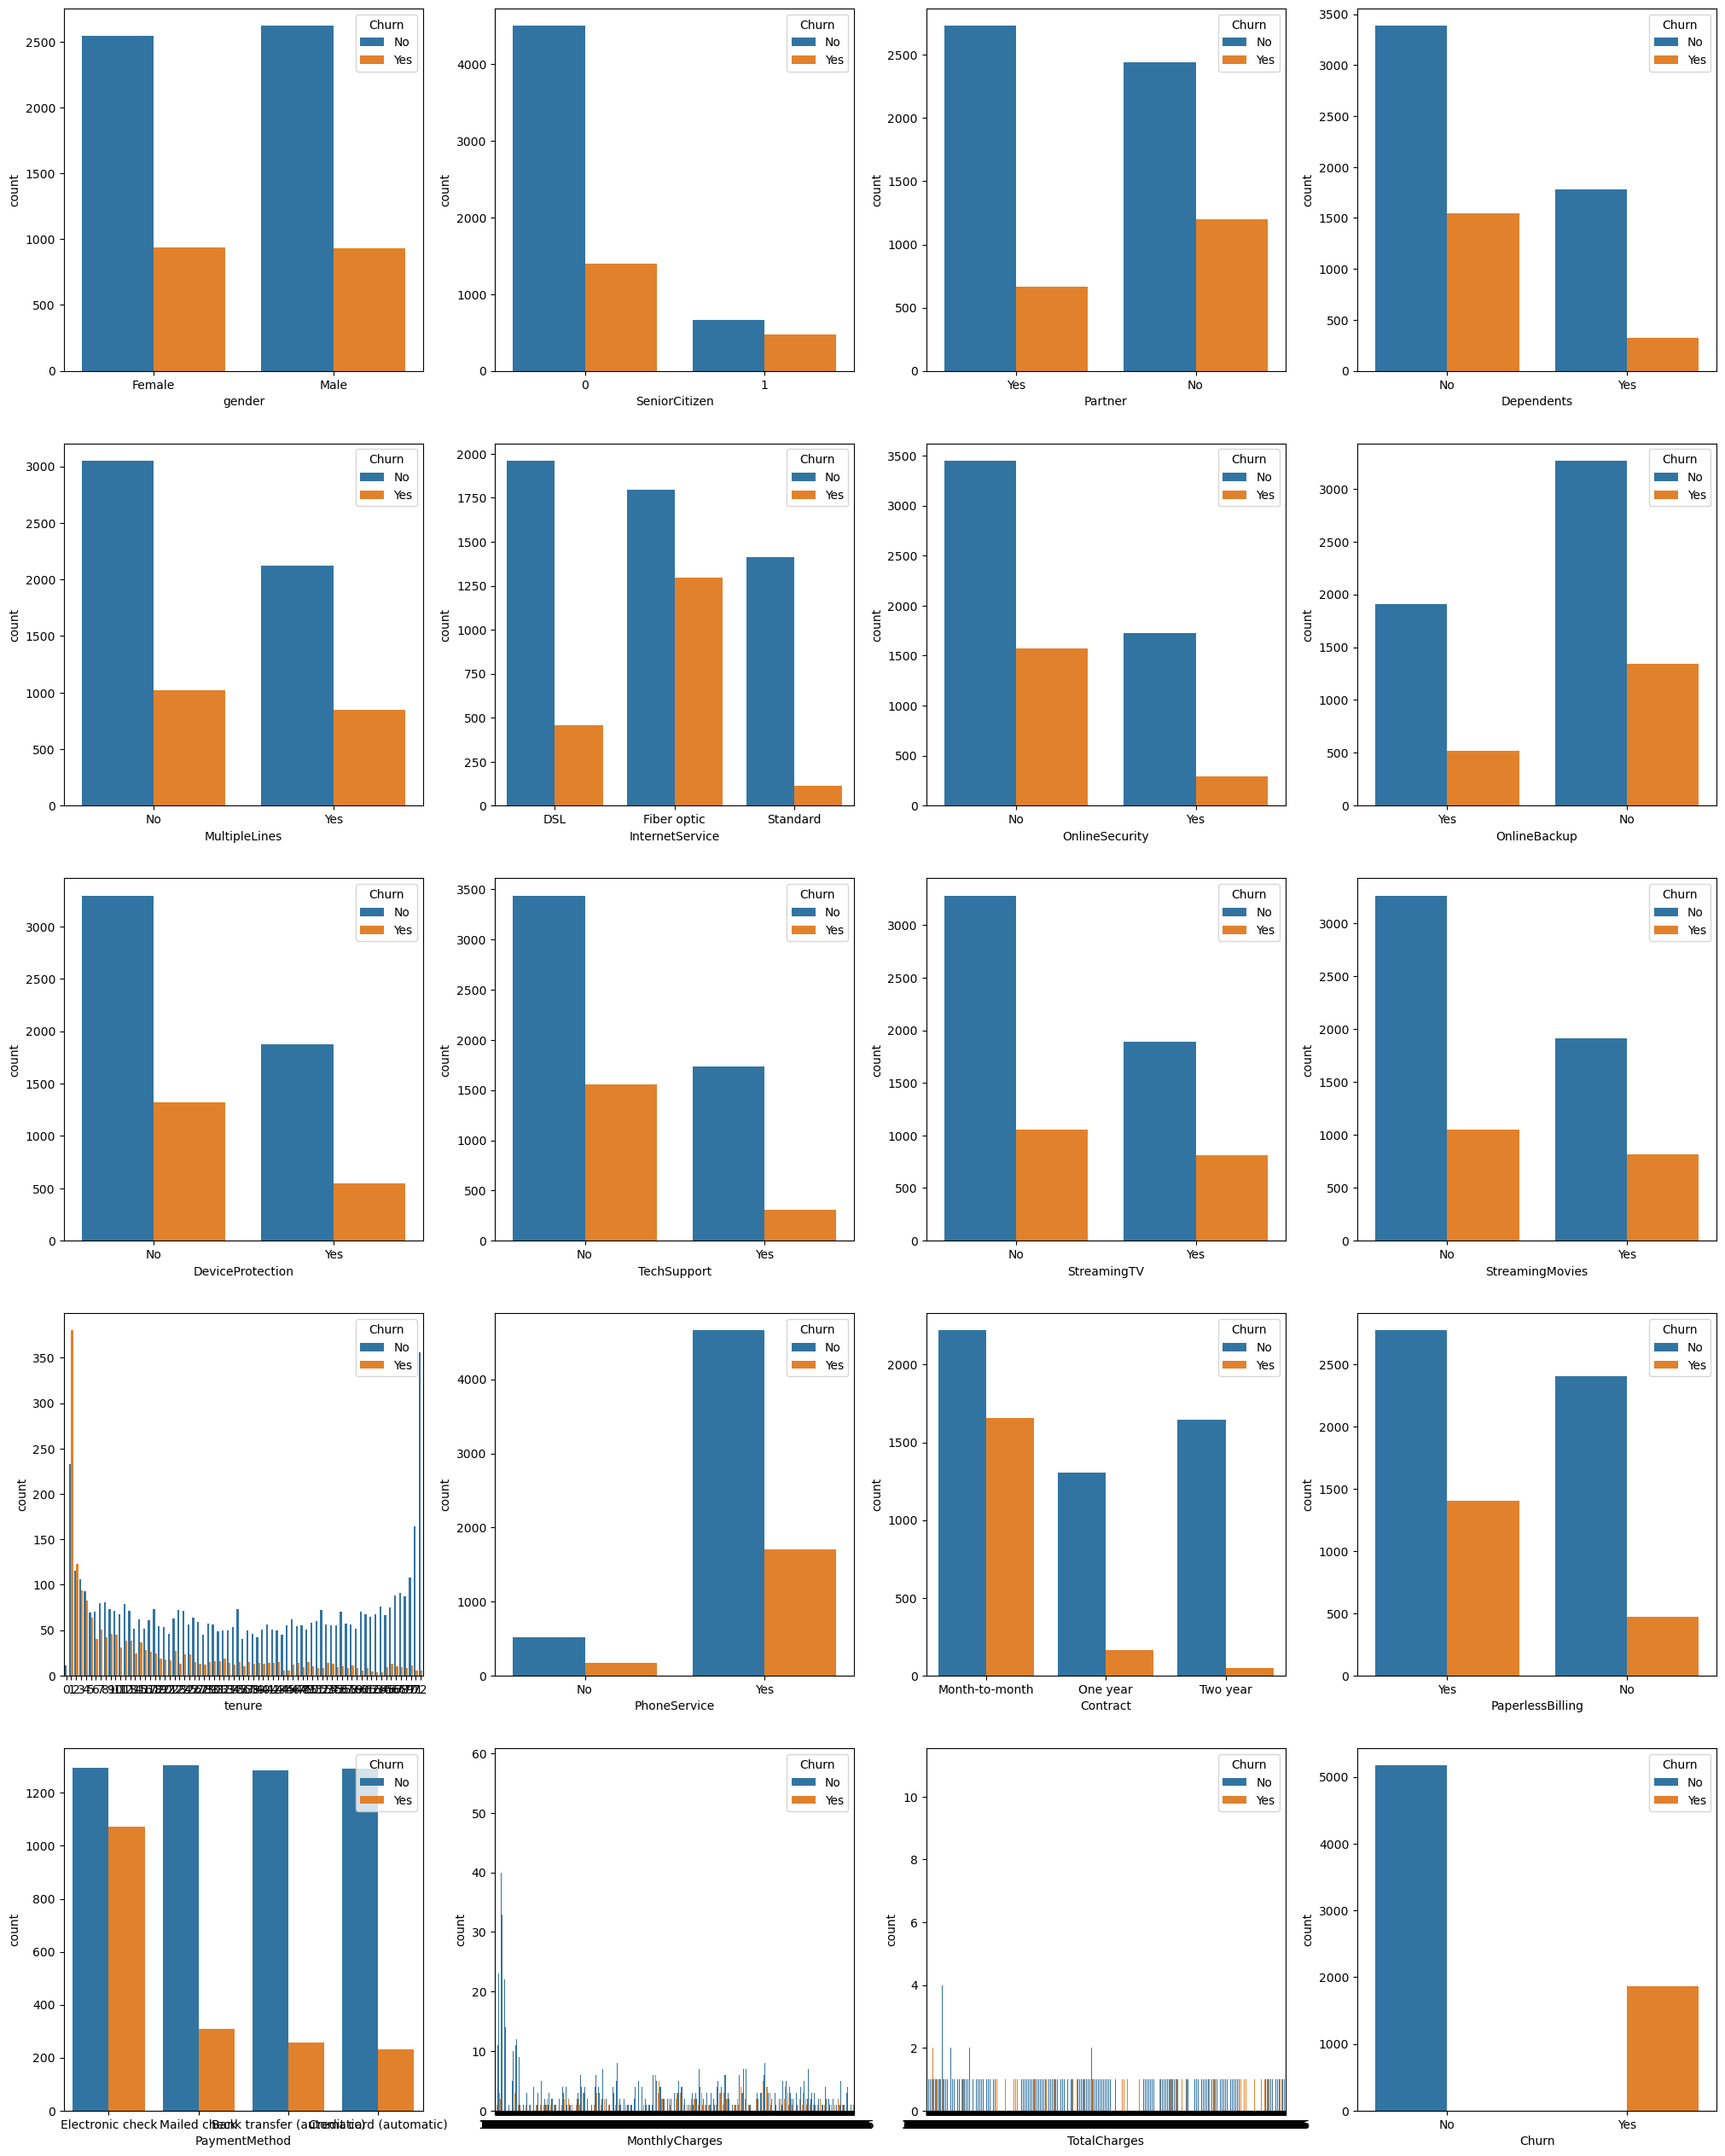

In [28]:
# Visiulize to see some partens/relationships
plt.figure(figsize=(25,32))
for i , cols in enumerate(df):
    plt.subplot(5,4,i+1)
    sns.countplot(data=df , x=cols , hue='Churn' )
    


In [29]:
# Above plots gives some insights on totals of people who suscribed and services they took

In [30]:
# Convert columns to numeric values for model building

df.replace({
    'Yes':1,
    'No':0,
    'Male':1,
    'Female':0
}, inplace=True)

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,DSL,0,1,0,0,0,0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,0,DSL,1,0,1,0,0,0,34,1,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,0,DSL,1,1,0,0,0,0,2,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,0,DSL,1,0,1,1,0,0,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,0,Fiber optic,0,0,0,0,0,0,2,1,Month-to-month,1,Electronic check,70.70,151.65,1


In [32]:
# Transform columns Contract,PaymentMethod and InternetService to numeric also

from sklearn.preprocessing import LabelEncoder

In [33]:
Contract_ = LabelEncoder()
PaymentMethod_ = LabelEncoder()
InternetService_ = LabelEncoder()

df['Contract_'] = Contract_.fit_transform(df['Contract'])
df['PaymentMethod_'] = Contract_.fit_transform(df['PaymentMethod'])
df['InternetService_'] = Contract_.fit_transform(df['InternetService'])

In [34]:
df.drop(['Contract','InternetService','PaymentMethod'] , axis='columns' , inplace=True)

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_,PaymentMethod_,InternetService_
0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,29.85,29.85,0,0,2,0
1,1,0,0,0,0,1,0,1,0,0,0,34,1,0,56.95,1889.5,0,1,3,0
2,1,0,0,0,0,1,1,0,0,0,0,2,1,1,53.85,108.15,1,0,3,0
3,1,0,0,0,0,1,0,1,1,0,0,45,0,0,42.30,1840.75,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,2,1,1,70.70,151.65,1,0,2,1


In [36]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
MultipleLines         int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
tenure                int64
PhoneService          int64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
Contract_             int32
PaymentMethod_        int32
InternetService_      int32
dtype: object

In [37]:
# TotalCharges need to be checked

df['TotalCharges'].unique().all()

'306.6'

In [38]:
df['TotalCharges'].unique().tolist()

['29.85',
 '1889.5',
 '108.15',
 '1840.75',
 '151.65',
 '820.5',
 '1949.4',
 '301.9',
 '3046.05',
 '3487.95',
 '587.45',
 '326.8',
 '5681.1',
 '5036.3',
 '2686.05',
 '7895.15',
 '1022.95',
 '7382.25',
 '528.35',
 '1862.9',
 '39.65',
 '202.25',
 '20.15',
 '3505.1',
 '2970.3',
 '1530.6',
 '4749.15',
 '30.2',
 '6369.45',
 '1093.1',
 '6766.95',
 '181.65',
 '1874.45',
 '20.2',
 '45.25',
 '7251.7',
 '316.9',
 '3548.3',
 '3549.25',
 '1105.4',
 '475.7',
 '4872.35',
 '418.25',
 '4861.45',
 '981.45',
 '3906.7',
 '97',
 '144.15',
 '4217.8',
 '4254.1',
 '3838.75',
 '1426.4',
 '1752.65',
 '633.3',
 '4456.35',
 '1752.55',
 '6311.2',
 '7076.35',
 '894.3',
 '7853.7',
 '4707.1',
 '5450.7',
 '2962',
 '957.1',
 '857.25',
 '244.1',
 '3650.35',
 '2497.2',
 '930.9',
 '887.35',
 '49.05',
 '1090.65',
 '7099',
 '1424.6',
 '177.4',
 '6139.5',
 '2688.85',
 '482.25',
 '2111.3',
 '1216.6',
 '79.35',
 '565.35',
 '496.9',
 '4327.5',
 '973.35',
 '918.75',
 '2215.45',
 '1057',
 '927.1',
 '1009.25',
 '2570.2',
 '74.7',

In [39]:
# Convert TotalCharges column to numeric data type

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors='coerce')

In [40]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
MultipleLines         int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
tenure                int64
PhoneService          int64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
Contract_             int32
PaymentMethod_        int32
InternetService_      int32
dtype: object

In [41]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
PhoneService         0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        11
Churn                0
Contract_            0
PaymentMethod_       0
InternetService_     0
dtype: int64

In [42]:
#Drop null values

df.dropna(inplace=True)

In [43]:
df_correlation = df.corr()

<Axes: >

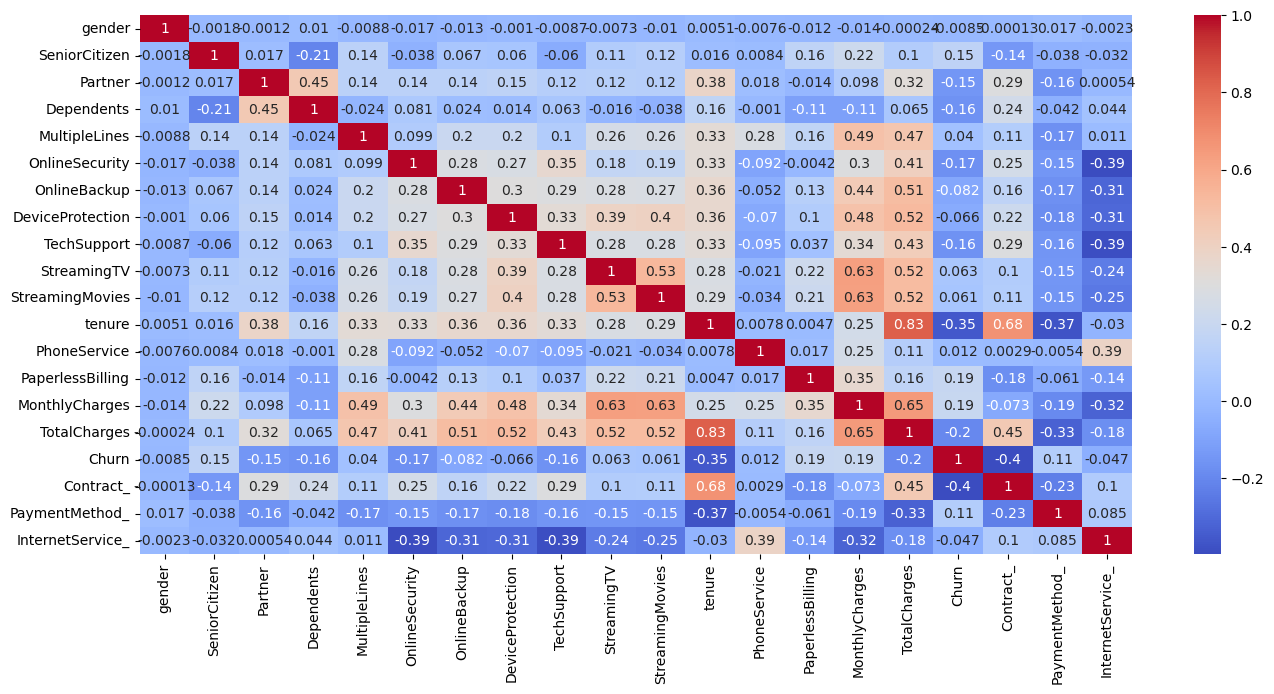

In [44]:
plt.figure(figsize=(16,7))

sns.heatmap(df_correlation , cmap='coolwarm' , annot=True)

In [45]:
# Train_Test 

from sklearn.model_selection import train_test_split

In [46]:
X= df.drop(['Churn'] , axis='columns')
y=df.Churn

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [48]:
len(X_test)

1407

In [49]:
len(X_train)

5624

In [50]:
# Import all required ibraries needed for model building

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [51]:
#Model building

models = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'GaussianNB':GaussianNB(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_test_predicted = model.predict(X_test)
    y_train_predicted = model.predict(X_train)
    
    score = model.score(X_test,y_test)
    
    print(list(models.keys())[i])
    print('Score {:.4f}\n'.format(score))
    

LogisticRegression
Score 0.7953

DecisionTreeClassifier
Score 0.7058

GaussianNB
Score 0.7477

RandomForestClassifier
Score 0.7868

SVC
Score 0.7278



In [308]:
# Logistics Regression and RandomForestClassifier is giving highest score , if need to run churn prediction I recommend it 
# Suport Vector giving lowest score